# Tutorial introduction to PyDEC
Python library for DEC and lowest order FEEC

Anil Hirani and Kaushik Kalyanaraman

---

## Manifold Simplicial Complexes or Meshes

In [1]:
import numpy as np    # Conveniently import a few packages
import matplotlib.pyplot as plt

Let's start by creating a small of a unit square. We will do so by stating the vertex locations, that is, the embedding of the vertices in $\mathbb{R}^2$ and the connectivity of these vertices.

In [2]:
# Create a small mesh of square
from pydec import simplicial_complex

vertices = np.array(
       [[-0.5 , -0.5 ],
       [-0.5 ,  0.5 ],
       [-0.04,  0.2 ],
       [ 0.  , -0.5 ],
       [ 0.  ,  0.5 ],
       [ 0.04,  0.2 ],
       [ 0.5 , -0.5 ],
       [ 0.5 ,  0.5 ]])
triangles = np.array([[0, 2, 1],[0, 3, 2],[1, 2, 4],
                      [2, 3, 5],[2, 5, 4],[3, 6, 5],
                      [4, 5, 7],[5, 6, 7]], dtype=int)
sc = simplicial_complex(vertices, triangles)

Note that the triangles are not arbitarily specified by with a consistent orientation. Here, we assume that the underlying manifold, the unit square, is given an orientation that can be thought of geometrically as being "counter clockwise", and therefore each of the individual triangles (aka simplices) are all given this orientation.

Now draw the mesh created above using `matplotlib`

(np.float64(-0.55), np.float64(0.55), np.float64(-0.55), np.float64(0.55))

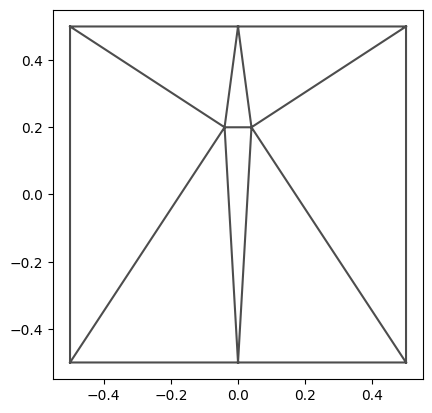

In [3]:
# Draw mesh using matplotlib
import matplotlib.pyplot as plt

plt.triplot(vertices[:, 0], vertices[:, 1], triangles, color=(0.3, 0.3, 0.3))
plt.axis('equal')
plt.axis('square')

#### On Orientation ####

There is a system for orienting the top dimensional simplices (triangles here) and lower dimensional simplices (edges). These are specified using the vertex ordering.

Meshes can also be loaded from various types of files. Here is an example if using text files included with this tutorial.

(np.float64(-0.05), np.float64(1.05), np.float64(-0.05), np.float64(1.05))

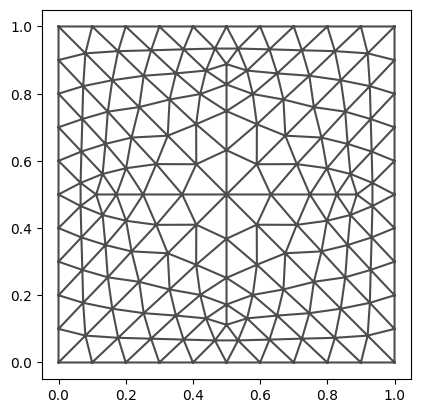

In [4]:
# Load larger mesh of square and display it using Matplotlib
vertices = np.loadtxt('meshes/square272/vertices.txt')
triangles = np.loadtxt('meshes/square272/triangles.txt', dtype=int)
plt.triplot(vertices[:, 0], vertices[:, 1], triangles, color=(0.3, 0.3, 0.3))
plt.axis('equal'); plt.axis('square')

(np.float64(-2.2), np.float64(2.2), np.float64(-2.2), np.float64(2.2))

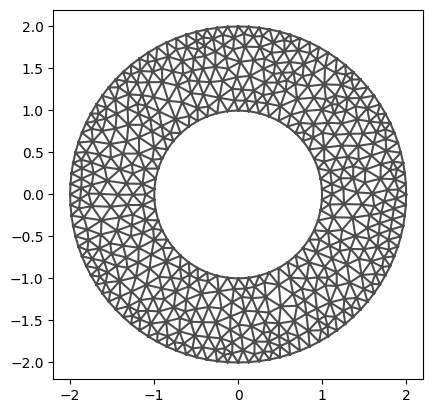

In [5]:
# Load a mesh of an annulus and display it.

vertices = np.loadtxt('meshes/annulus974/vertices.txt')
triangles = np.loadtxt('meshes/annulus974/triangles.txt', dtype=int)
plt.triplot(vertices[:, 0], vertices[:, 1], triangles, color=(0.3, 0.3, 0.3))
plt.axis('equal'); plt.axis('square')

---

## Discrete exterior derivatives

The discrete exterior derivatives are the coboundary operators. There are 3 for a mesh in two dimensions: $d_0$, $d_1$, and $d_2$. Let's print those for the square with 8 triangles which is reproduced below
![Square figure](square8.pdf)

In [6]:
# d0, d1, d2

vertices = np.loadtxt('meshes/square8/vertices.txt')
triangles = np.loadtxt('meshes/square8/triangles.txt', dtype=int)
sc = simplicial_complex(vertices, triangles)    # Note that we have already imported simplicial_complex()
d0 = sc[0].d    # Discrete exterior derivative map from 0-cochains to 1-cochains and...
d1 = sc[1].d    # ... from 1-cochains to 2-cochains.
d2 = sc[2].d    # ... from 1-cochains to 2-cochains.

In [7]:
sc

simplicial_complex:
  complex:
            8:  2-simplices
           15:  1-simplices
            8:  0-simplices

In [8]:
d0, d0.todense()

(<15x8 sparse matrix of type '<class 'numpy.int8'>'
 	with 30 stored elements in Compressed Sparse Column format>,
 matrix([[-1,  1,  0,  0,  0,  0,  0,  0],
         [-1,  0,  1,  0,  0,  0,  0,  0],
         [-1,  0,  0,  1,  0,  0,  0,  0],
         [ 0, -1,  1,  0,  0,  0,  0,  0],
         [ 0, -1,  0,  0,  1,  0,  0,  0],
         [ 0,  0, -1,  1,  0,  0,  0,  0],
         [ 0,  0, -1,  0,  1,  0,  0,  0],
         [ 0,  0, -1,  0,  0,  1,  0,  0],
         [ 0,  0,  0, -1,  0,  1,  0,  0],
         [ 0,  0,  0, -1,  0,  0,  1,  0],
         [ 0,  0,  0,  0, -1,  1,  0,  0],
         [ 0,  0,  0,  0, -1,  0,  0,  1],
         [ 0,  0,  0,  0,  0, -1,  1,  0],
         [ 0,  0,  0,  0,  0, -1,  0,  1],
         [ 0,  0,  0,  0,  0,  0, -1,  1]], dtype=int8))

In [9]:
d1, d1.todense()

(<8x15 sparse matrix of type '<class 'numpy.int8'>'
 	with 24 stored elements in Compressed Sparse Column format>,
 matrix([[-1,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
         [ 0, -1,  1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  1, -1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  1,  0, -1,  1,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0, -1,  1,  0,  0, -1,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0, -1,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  1,  0],
         [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  1]],
        dtype=int8))

We verify the complex property: $d_1 d_0 = 0$ using matrix multiplication.

In [10]:
# We verify the complex property

print((d1*d0).todense())

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


## Hodge star

The DEC Hodge star matrices are diagonal matrices with all positive entries. The values are dual over primal measure. There is one matrix for each dimension (0,1,2).

In [11]:
# Hodge star 0, 1, 2 matrices


DEC does not save an explicit representation of the dual cell complex

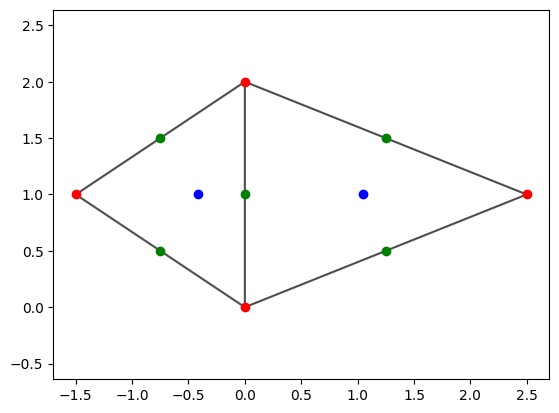

In [12]:
# We try to understand this on the earlier small mesh

vertices = np.array(
       [[0, 0],
       [0, 2],
       [2.5,  1],
       [-1.5, 1]])
triangles = np.array([[0, 2, 1],[0, 1, 3]], dtype=int)
sc = simplicial_complex(vertices, triangles)
plt.triplot(vertices[:, 0], vertices[:, 1], triangles, color=(0.3, 0.3, 0.3))
plt.axis('equal')
plt.plot(sc[0].circumcenter[:, 0], sc[0].circumcenter[:, 1], 'ro')
plt.plot(sc[1].circumcenter[:, 0], sc[1].circumcenter[:, 1], 'go')
plt.plot(sc[2].circumcenter[:, 0], sc[2].circumcenter[:, 1], 'bo');

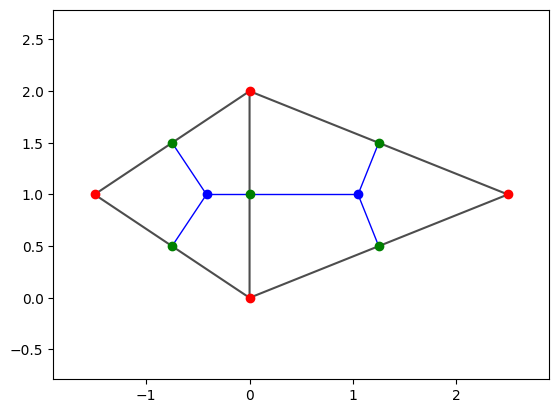

In [13]:
# Visualize the dual edges

plt.triplot(vertices[:, 0], vertices[:, 1], triangles, color=(0.3, 0.3, 0.3))
plt.axis('equal')
plt.plot(sc[0].circumcenter[:, 0], sc[0].circumcenter[:, 1], 'ro')
plt.plot(sc[1].circumcenter[:, 0], sc[1].circumcenter[:, 1], 'go')
plt.plot(sc[2].circumcenter[:, 0], sc[2].circumcenter[:, 1], 'bo')

from itertools import combinations
from pydec import Simplex
from matplotlib.collections import PolyCollection, LineCollection

dual_lines = set(); remove_dual_lines = set()
for s_index, simplex in enumerate(sc.simplices):
    cc_simplex = sc[2].circumcenter[s_index]
    cc_simplex_bary = sc[2].bary_circumcenter[s_index]
    cc_simplex_bary_signs = [0, 0, 0]
    for i in range(3):
        if abs(cc_simplex_bary[i]) < 1e-12:
            cc_simplex_bary_signs[i] = 0
        else:
            cc_simplex_bary_signs[i] = int(np.sign(cc_simplex_bary[i]))

    edges = [edge for edge in combinations(np.sort(simplex), 2)]
    local_opp_vertex = [2, 1, 0]
    edge_indices = [sc[1].simplex_to_index[Simplex(edge)] for edge in edges]
    cc_edges = [sc[1].circumcenter[e_index] for e_index in edge_indices]
    for e_index, cc_edge in enumerate(cc_edges):
        cc_edge = tuple(cc_edge)
        cc_simplex = tuple(cc_simplex)
        # Add every half dual edge in a triangle
        dual_lines.add((cc_edge, cc_simplex))

        # However, if the circumcenter is outside the triangles, need to modify the
        # addition of the half dual edge for visualization in accordance with sign
        # convention for DEC. Thus, for a circumcenter lying outside a triangle,
        # remove the half dual edges to the common edge of the triangle and from its
        # neighbor where the circumcenter lies. Finish by introducing the dual edge
        # between the circumcenters of these two triangles.
        cc_oppvrtx_sign = cc_simplex_bary_signs[local_opp_vertex[e_index]]
        if cc_oppvrtx_sign <= 0:
            curr_edge_index = edge_indices[e_index]
            opp_s_index = (set(sc[1].d.getcol(curr_edge_index).indices) - {s_index})
            if len(opp_s_index) != 0:
                opp_s_index = opp_s_index.pop()
                opp_cc_simplex = sc[2].circumcenter[opp_s_index]                        
                opp_cc_simplex = tuple(opp_cc_simplex)
                dual_lines.add((cc_simplex,opp_cc_simplex))
                remove_dual_lines.add((cc_edge, cc_simplex))
                # There is still a catch! The triangle could be right angled and have the
                # circumcenter on its hypotenuse. Then, have to factor this degeneracy of
                # half dual edges while building the visualization.
                if cc_oppvrtx_sign < 0:
                    remove_dual_lines.add((cc_edge, opp_cc_simplex))
                else:
                    # For a right angled triangle, do not remove the edge center to
                    # circumcenter dual line since it does not exist.
                    pass

dual_lines -= remove_dual_lines
dual_lines = list(dual_lines)
col = LineCollection(dual_lines, zorder=1)
col.set_linewidth(1)
col.set_alpha(1)
col.set_edgecolor((0, 0, 1))
ax = plt.gca()
ax.set_facecolor('none')
ax.add_collection(col, autolim=True)
ax.autoscale_view()
ax.set_aspect('equal')
xmin, ymin, xmax, ymax = ax.dataLim.extents
ax.set_xlim((xmin - (xmax-xmin)*.1, xmax + (xmax-xmin)*.1))
ax.set_ylim((ymin - (ymax-ymin)*.1, ymax + (ymax-ymin)*.1));

---

## PDEs with Hodge-Laplacian

Now we will solve two different PDEs with Hodge-Laplace operator. This can be done in mixed form or direct form.

### Hodge-Laplace Poisson problem on $0$-forms 

$\Delta_0 u = f$ on $M$ with $*d u = 0$ on $\partial M$ and $u \perp$ harmonic 0-forms.

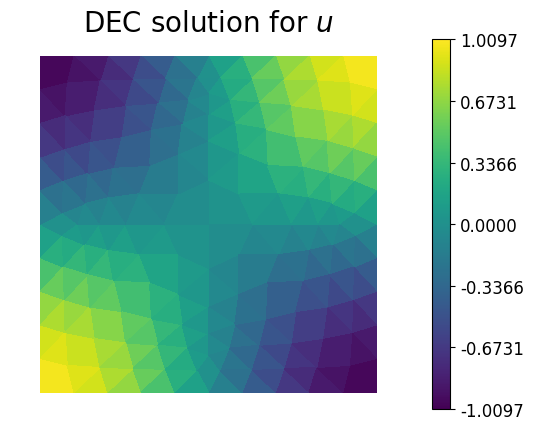

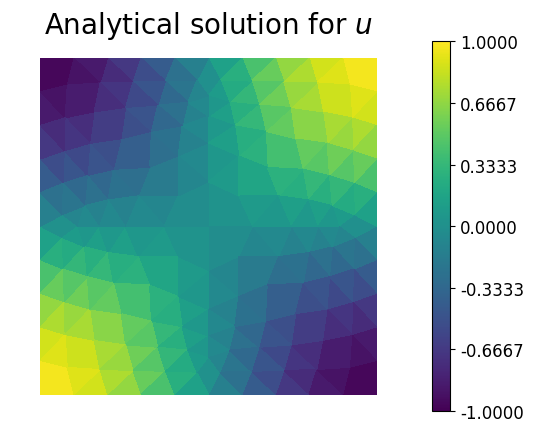

In [14]:
import scipy.sparse as sprs
import scipy.sparse.linalg as spla

# We first need a known solution and the corresponding right hand side function
def u_analytical(x, y):
    return np.cos(np.pi*x) * np.cos(np.pi*y)

def f(x, y):
    return 2 * np.pi**2 * np.cos(np.pi*x) * np.cos(np.pi*y)

# We shall solve this problem on the unit square from above
vertices = np.loadtxt('meshes/square272/vertices.txt')
triangles = np.loadtxt('meshes/square272/triangles.txt', dtype=np.int64)

# We first set up an instance of the simplicial_complex class
sc = simplicial_complex(vertices, triangles)

# We now set up the discretized Laplacian and right hand side
N0 = sc[0].num_simplices    # Number of vertices
d0 = sc[0].d    # The d0 matrix
hodge0 = sc[0].star    # Hodge star 0
hodge1 = sc[1].star    # Hodge star 1
A = d0.T * hodge1 * d0    # Stiffness matrix corresponding to the system
b = np.zeros(N0)    # Initial right hand side...
u = np.zeros(N0)    # and solution vectors
b = np.array([f(*v) for v in sc.vertices])    # Compute the discretized right hand side

C = np.asmatrix(np.ones(N0))    # Constraint matrix for u orthogonal to harmonics
K = sprs.bmat([[A, C.T],
               [C, None]], format='csr')
rhs = np.hstack((hodge0 * b, [0]))    # Solve constrainted linear system using Lagrange multipliers
x = spla.spsolve(K, rhs)    # Solution using a sparse direct solvers
u = x[:N0]    # Extract the solution...
lmbda = x[N0]    # and ignore the Lagrange multiplier

# Visualize
u_true = np.array([u_analytical(*v) for v in sc.vertices])
plt.figure(); ax = plt.gca()
plt.tripcolor(vertices[:, 0], vertices[:, 1], triangles, u, vmin=min(u), vmax=max(u))
cb = plt.colorbar(ticks=np.linspace(min(u), max(u), 7), format='%1.4f')
plt.axes(cb.ax);
plt.yticks(fontsize=12); plt.axes(ax)
ax.set_title("DEC solution for $u$", fontsize=20)
plt.axis('equal'); ax.set_axis_off()

plt.figure(); ax = plt.gca()
plt.tripcolor(vertices[:, 0], vertices[:, 1], triangles, u_true, vmin=min(u_true), vmax=max(u_true))
cb = plt.colorbar(ticks=np.linspace(min(u_true), max(u_true), 7), format='%1.4f')
plt.axes(cb.ax);
plt.yticks(fontsize=12); plt.axes(ax)
ax.set_title("Analytical solution for $u$", fontsize=20)
plt.axis('equal'); ax.set_axis_off()

In [15]:
u.shape

(157,)

#### Helmholtz problem

Hodge-Laplace Helmholtz problem on $0$-forms: $\Delta_0 u = \lambda u$ on $M$ with $*u = 0$, $* d u = 0$ on $\partial M$.

Computed eigenvalues are:  [-2.39912257e-15  4.60036850e-01  4.60089079e-01  1.79669985e+00
  1.79707573e+00  3.89624420e+00]


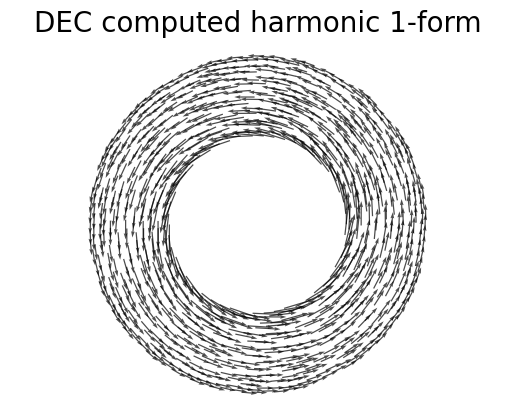

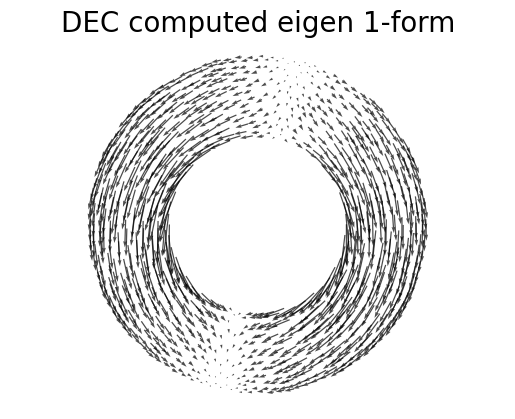

In [16]:
import numpy.linalg as npla
from pydec import simplex_quivers

# We shall solve this problem on the annulus domain as earlier
vertices = np.loadtxt('meshes/annulus974/vertices.txt')
triangles = np.loadtxt('meshes/annulus974/triangles.txt', dtype=int)

# Setup and solve
sc = simplicial_complex(vertices, triangles)

# Obtain the discrete exterior derivative matrices
d0 = sc[0].d
d1 = sc[1].d

# The count of the number of vertices and edges
N0 = sc[0].num_simplices
N1 = sc[1].num_simplices

# The DEC Hodge stars
hodge0 = sc[0].star
hodge1 = sc[1].star
hodge2 = sc[2].star

# Setup the matrices for the generalized Hodge Laplacian Helmholtz problem
A = sprs.bmat([[hodge0, -d0.T * hodge1],
               [hodge1 * d0, d1.T * hodge2 * d1]], format='csr')
B = sprs.bmat([[sprs.csr_matrix((N0, N0)), None], 
               [None, hodge1]], format='csr')

# Compute the eigenvalues and eigenvectors using a sparse eigensolver.
# We are trying to obtain the smallest magnitude {eigenvalues, eigenvectors} using shifts
evals, evectors = spla.eigsh(A=A, k=6, M=B, sigma=0.01)
print("Computed eigenvalues are: ", evals)

# (Note: Eigenvectors are stored column wise, e.g., the first eigenvector is in the first column in evectors.)

# Obtain the u component of the eigenvectors
u_evectors = evectors[N0:, :]
# Normalize eigenvectors for "nicer" plots (remember this is still an eigenvector)
for i in range(evectors.shape[1]):
    u_evectors[:, i] /= npla.norm(u_evectors[:, i])

# Visualize the eigenvectors corresponding to the smallest and second smallest magnitude eigenvalues.
# PyDEC in-built function to interpolate a 1-cochain to a Whitney 1-form, and sample it at the simplex barycenters
bases, arrows1 = simplex_quivers(sc, u_evectors[:, 0])

plt.figure(); ax = plt.gca()
custom_quiver = {'color': 'k', 'alpha': 0.7, 'scale': 1, 'scale_units': 'xy', 'width': 0.0025}
ax.quiver(bases[:, 0], bases[:, 1], arrows1[:, 0], arrows1[:, 1],**custom_quiver)
ax.set_title("DEC computed harmonic 1-form", fontsize=20)
plt.axis('equal'); ax.set_axis_off()

# The eigenvector corresponding to the second nonzero eigenvalue
bases, arrows2 = simplex_quivers(sc, u_evectors[:, 1])

plt.figure(); ax = plt.gca()
ax.quiver(bases[:, 0], bases[:, 1], arrows2[:, 0], arrows2[:, 1],**custom_quiver)
ax.set_title("DEC computed eigen 1-form", fontsize=20)
plt.axis('equal'); ax.set_axis_off()


---

## Connection with finite element exterior calculus

By replacing the diagonal DEC mass matrices with lowest order FEEC mass matrices the above setup becomes a finite element method.

In [17]:
# FEEC version of Hodge-Laplace problem on 0-forms

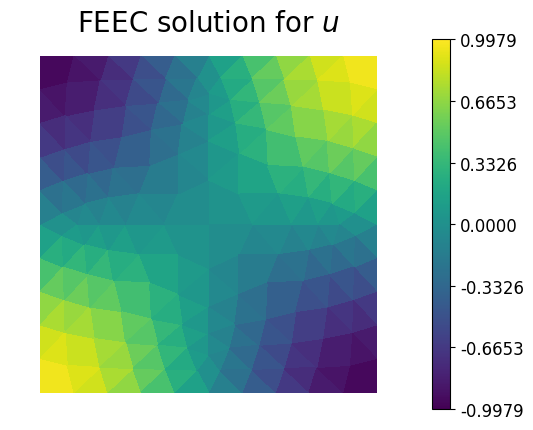

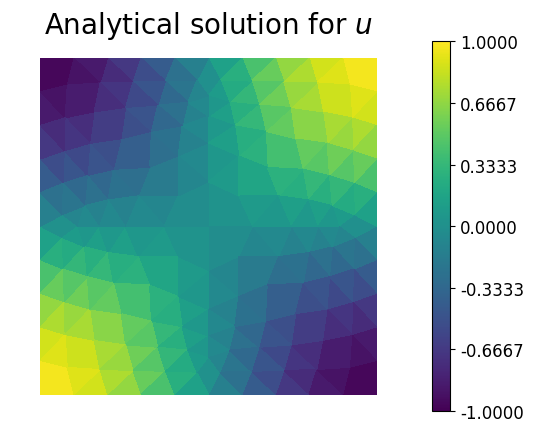

In [18]:
# See the earlier code for more comments about the various sections

from pydec import simplicial_complex, whitney_innerproduct
import scipy.sparse as sprs
import scipy.sparse.linalg as spla

# Define the analytical solution and right hand side function
def u_analytical(x, y):
    return np.cos(np.pi*x) * np.cos(np.pi*y)

def f(x, y):
    return 2 * np.pi**2 * np.cos(np.pi*x) * np.cos(np.pi*y)

# Read the mesh
vertices = np.loadtxt('meshes/square272/vertices.txt')
triangles = np.loadtxt('meshes/square272/triangles.txt', dtype=np.int64)
sc = simplicial_complex(vertices, triangles)

# Set up the discretized Laplacian and right hand side
N0 = sc[0].num_simplices    # Number of vertices
d0 = sc[0].d    # The d0 matrix
hodge0 = whitney_innerproduct(sc, 0)    # FEEC mass matrix for 0-forms in the polynomial subspace
hodge1 = whitney_innerproduct(sc, 1)    # FEEC mass matrix for 1-forms in the polynomial subspace
A = d0.T * hodge1 * d0    # Stiffness matrix corresponding to the system
b = np.zeros(N0)    # Initial right hand side...
u = np.zeros(N0)    # and solution vectors
b = np.array([f(*v) for v in sc.vertices])    # Compute the discretized right hand side

C = np.asmatrix(np.ones(N0))    # Constraint matrix for u orthogonal to harmonics
K = sprs.bmat([[A, C.T],
               [C, None]], format='csr')
rhs = np.hstack((hodge0 * b, [0]))    # Solve constrainted linear system using Lagrange multipliers
x = spla.spsolve(K, rhs)    # Solution using a sparse direct solvers
u = x[:N0]    # Extract the solution...
lmbda = x[N0]    # and ignore the Lagrange multiplier

# Visualize
u_true = np.array([u_analytical(*v) for v in sc.vertices])
plt.figure(); ax = plt.gca()
plt.tripcolor(vertices[:, 0], vertices[:, 1], triangles, u, vmin=min(u), vmax=max(u))
cb = plt.colorbar(ticks=np.linspace(min(u), max(u), 7), format='%1.4f')
plt.axes(cb.ax);
plt.yticks(fontsize=12); plt.axes(ax)
ax.set_title("FEEC solution for $u$", fontsize=20)
plt.axis('equal'); ax.set_axis_off()

plt.figure(); ax = plt.gca()
plt.tripcolor(vertices[:, 0], vertices[:, 1], triangles, u_true, vmin=min(u_true), vmax=max(u_true))
cb = plt.colorbar(ticks=np.linspace(min(u_true), max(u_true), 7), format='%1.4f')
plt.axes(cb.ax);
plt.yticks(fontsize=12); plt.axes(ax)
ax.set_title("Analytical solution for $u$", fontsize=20)
plt.axis('equal'); ax.set_axis_off()

In [19]:
# FEEC version of Helmholtz problem on 1-forms

In [ ]:
import numpy.linalg as npla
from pydec import simplex_quivers, whitney_innerproduct

# We shall solve this problem on the annulus domain as earlier
vertices = np.loadtxt('meshes/annulus974/vertices.txt')
triangles = np.loadtxt('meshes/annulus974/triangles.txt', dtype=int)

# Setup and solve
sc = simplicial_complex(vertices, triangles)

# Obtain the discrete exterior derivative matrices
d0 = sc[0].d
d1 = sc[1].d

# The count of the number of vertices and edges
N0 = sc[0].num_simplices
N1 = sc[1].num_simplices

# The DEC Hodge stars
hodge0 = whitney_innerproduct(sc, 0)
hodge1 = whitney_innerproduct(sc, 1)
hodge2 = whitney_innerproduct(sc, 2)

# Setup the matrices for the generalized Hodge Laplacian Helmholtz problem
A = sprs.bmat([[hodge0, -d0.T * hodge1],
               [hodge1 * d0, d1.T * hodge2 * d1]], format='csr')
B = sprs.bmat([[sprs.csr_matrix((N0, N0)), None], 
               [None, hodge1]], format='csr')

# Compute the eigenvalues and eigenvectors using a sparse eigensolver.
# We are trying to obtain the smallest magnitude {eigenvalues, eigenvectors} using shifts
evals, evectors = spla.eigsh(A=A, k=6, M=B, sigma=0.01)
print("Computed eigenvalues are: ", evals)

# (Note: Eigenvectors are stored column wise, e.g., the first eigenvector is in the first column in evectors.)

# Obtain the u component of the eigenvectors
u_evectors = evectors[N0:, :]
# Normalize eigenvectors for "nicer" plots (remember this is still an eigenvector)
for i in range(evectors.shape[1]):
    u_evectors[:, i] /= npla.norm(u_evectors[:, i])

# Visualize the eigenvectors corresponding to the smallest and second smallest magnitude eigenvalues.
# PyDEC in-built function to interpolate a 1-cochain to a Whitney 1-form, and sample it at the simplex barycenters
bases, arrows1 = simplex_quivers(sc, u_evectors[:, 0])

plt.figure(); ax = plt.gca()
custom_quiver = {'color': 'k', 'alpha': 0.7, 'scale': 1, 'scale_units': 'xy', 'width': 0.0025}
ax.quiver(bases[:, 0], bases[:, 1], arrows1[:, 0], arrows1[:, 1],**custom_quiver)
ax.set_title("DEC computed harmonic 1-form", fontsize=20)
plt.axis('equal'); ax.set_axis_off()

# The eigenvector corresponding to the second nonzero eigenvalue
bases, arrows2 = simplex_quivers(sc, u_evectors[:, 1])

plt.figure(); ax = plt.gca()
ax.quiver(bases[:, 0], bases[:, 1], arrows2[:, 0], arrows2[:, 1],**custom_quiver)
ax.set_title("DEC computed eigen 1-form", fontsize=20)
plt.axis('equal'); ax.set_axis_off()


---

## Working with graphs

Abstract simplicial complexes in PyDEC allows working with graphs and graph Laplacians.

In [ ]:
# Create a simple graph

The graph Laplacian is $d_0^T d_0$

In [ ]:
# Print d_0 and the graph Laplacian